In [1]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
import os

In [2]:
Sh= pd.read_csv("Book1.csv")

In [3]:
Sh.head(2)

,Body,Type
0,Congrats on your new 4G handset! Exclusive off...,Spam
1,Your Google verification code is 743610,Important


In [4]:
df3=Sh

In [89]:
category_codes = {
    'financial': 0,
    'Important': 1,
    'spam': 2,
    'Spam': 2,
}

In [90]:
df3['Category_Code'] = df3['Type']
df3 = df3.replace({'Category_Code':category_codes})

In [92]:
df3

,Body,Type,Category_Code
0,Congrats on your new 4G handset! Exclusive off...,Spam,2
1,Your Google verification code is 743610,Important,1
2,46322 is your one time password to proceed on ...,Important,1
3,Your One Time Password(OTP) for Syndicate Bank...,Important,1
4,You've received Rs.50 cashback from PhonePe in...,financial,0
5,Recharge of Rs.50 for Airtel Mobile (994536905...,spam,2
6,"Recharge done on 27-10-2017 06:59PM,MRP:Rs50.0...",spam,2
7,Benefit: Talktime of 39.37 in main account. Di...,spam,2
8,933946 is the otp for syndicate upi transaction,Important,1
9,Your a/c no.XXXXXXXX055690 is has been registe...,financial,0


In [69]:
from sklearn.model_selection import train_test_split

In [93]:
X_train, X_test, y_train, y_test = train_test_split(df3['Body'], 
                                                    df3['Category_Code'], 
                                                    test_size=0.15, 
                                                    random_state=8)

In [94]:
ngram_range = (1,2)
min_df = 10
max_df = 1.
max_features = 300

In [95]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [96]:
tfidf = TfidfVectorizer(encoding='utf-8',
                        ngram_range=ngram_range,
                        stop_words=None,
                        lowercase=False,
                        max_df=max_df,
                        min_df=min_df,
                        max_features=max_features,
                        norm='l2',
                        sublinear_tf=True)
                        
features_train = tfidf.fit_transform(X_train).toarray()
labels_train = y_train
print(features_train.shape)

features_test = tfidf.transform(X_test).toarray()
labels_test = y_test
print(features_test.shape)

(31, 18)
(6, 18)


In [97]:
print(features_test)

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         1.         0.         0.        ]
 [0.2253771  0.26948376 0.         0.         0.21789672 0.21789672
  0.30369554 0.3170359  0.         0.25029408 0.30369554 0.25029408
  0.30369554 0.25958888 0.21076439 0.20394917 0.2415307  0.25958888]
 [0.23608141 0.28228292 0.         0.33209356 0.22824575 0.22824575
  0.3181196  0.33209356 0.33209356 0.         0.         0.26218182
  0.3181196  0.         0.22077467 0.21363575 0.25300223 0.        ]
 [0.         0.         0.66028333 0.         0.         0.
  0.         0.         0.         0.52128167 0.         0.
  0.         0.         0.         0.         0.         0.54063976]
 [0.2495673  0.29840802 0.35106403 0.         0.24128403 0.24128403
  0.         0.         0.         0.27715866 0.33629182 0.27715866
  0.         0.2874511  0.23338618 0.22583946 0.26745469 0.2874511 ]
 [0.   

In [98]:
from sklearn.feature_selection import chi2
import numpy as np

for Product, category_id in sorted(category_codes.items()):
    features_chi2 = chi2(features_train, labels_train == category_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("# '{}' category:".format(Product))
    print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-5:])))
    print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-2:])))
    print("")

# 'Important' category:
  . Most correlated unigrams:
. 2017
. 00
. Rs
. is
. for
  . Most correlated bigrams:
. 00 on
. on 27

# 'Spam' category:
  . Most correlated unigrams:
. 17
. UPI
. Your
. 150
. is
  . Most correlated bigrams:
. 51 00
. 00 on

# 'financial' category:
  . Most correlated unigrams:
. 51
. 17
. UPI
. 150
. for
  . Most correlated bigrams:
. 51 00
. 00 on

# 'spam' category:
  . Most correlated unigrams:
. 17
. UPI
. Your
. 150
. is
  . Most correlated bigrams:
. 51 00
. 00 on



In [99]:
bigrams

['on 27', '51 00', '00 on']

In [100]:
import pickle

In [101]:
# X_train
with open('C:\\Users\\Sanjana Ashtaputre\\Downloads//X_train.pickle', 'wb') as output:
    pickle.dump(X_train, output)
    
# X_test    
with open('C:\\Users\\Sanjana Ashtaputre\\Downloads//X_test.pickle', 'wb') as output:
    pickle.dump(X_test, output)
    
# y_train
with open('C:\\Users\\Sanjana Ashtaputre\\Downloads//y_train.pickle', 'wb') as output:
    pickle.dump(y_train, output)
    
# y_test
with open('C:\\Users\\Sanjana Ashtaputre\\Downloads//y_test.pickle', 'wb') as output:
    pickle.dump(y_test, output)
    
# df
with open('C:\\Users\\Sanjana Ashtaputre\\Downloads//df.pickle', 'wb') as output:
    pickle.dump(df3, output)
    
# features_train
with open('C:\\Users\\Sanjana Ashtaputre\\Downloads//features_train.pickle', 'wb') as output:
    pickle.dump(features_train, output)

# labels_train
with open('C:\\Users\\Sanjana Ashtaputre\\Downloads//labels_train.pickle', 'wb') as output:
    pickle.dump(labels_train, output)

# features_test
with open('C:\\Users\\Sanjana Ashtaputre\\Downloads//features_test.pickle', 'wb') as output:
    pickle.dump(features_test, output)

# labels_test
with open('C:\\Users\\Sanjana Ashtaputre\\Downloads//labels_test.pickle', 'wb') as output:
    pickle.dump(labels_test, output)
    
# TF-IDF object
with open('C:\\Users\\Sanjana Ashtaputre\\Downloads//tfidf.pickle', 'wb') as output:
    pickle.dump(tfidf, output)

In [102]:
#importing libraries
import pickle
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Loading Data.

In [105]:
# Dataframe
path_df = "C:\\Users\\Sanjana Ashtaputre\\Downloads//df.pickle"
with open(path_df, 'rb') as data:
    df = pickle.load(data)

# features_train
path_features_train = "C:\\Users\\Sanjana Ashtaputre\\Downloads//features_train.pickle"
with open(path_features_train, 'rb') as data:
    features_train = pickle.load(data)

# labels_train
path_labels_train = "C:\\Users\\Sanjana Ashtaputre\\Downloads//labels_train.pickle"
with open(path_labels_train, 'rb') as data:
    labels_train = pickle.load(data)

# features_test
path_features_test = "C:\\Users\\Sanjana Ashtaputre\\Downloads//features_test.pickle"
with open(path_features_test, 'rb') as data:
    features_test = pickle.load(data)

# labels_test
path_labels_test = "C:\\Users\\Sanjana Ashtaputre\\Downloads//labels_test.pickle"
with open(path_labels_test, 'rb') as data:
    labels_test = pickle.load(data)

Let's check the dimension of our feature vectors:

In [106]:
print(features_train.shape)
print(features_test.shape)

(31, 18)
(6, 18)


Cross-Validation for Hyperparameter tuning
First, we can see what hyperparameters the model has:

In [107]:
rf_0 = RandomForestClassifier(random_state = 8)

print('Parameters currently in use:\n')
pprint(rf_0.get_params())

Parameters currently in use:

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': 8,
 'verbose': 0,
 'warm_start': False}


We'll tune the following ones:

n_estimators = number of trees in the forest.

max_features = max number of features considered for splitting a node

max_depth = max number of levels in each decision tree

min_samples_split = min number of data points placed in a node before the node is split

min_samples_leaf = min number of data points allowed in a leaf node

bootstrap = method for sampling data points (with or without replacement)

Randomized Search Cross Validation
We first need to define the grid:

In [108]:
# n_estimators
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)]

# max_features
max_features = ['auto', 'sqrt']

# max_depth
max_depth = [int(x) for x in np.linspace(20, 100, num = 5)]
max_depth.append(None)

# min_samples_split
min_samples_split = [2, 5, 10]

# min_samples_leaf
min_samples_leaf = [1, 2, 4]

# bootstrap
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [20, 40, 60, 80, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000]}


Then, we'll perform the Random Search:

In [110]:
# First create the base model to tune
print(features_train,labels_train)
rfc = RandomForestClassifier(random_state=8)

# Definition of the random search
random_search = RandomizedSearchCV(estimator=rfc,
                                   param_distributions=random_grid,
                                   n_iter=50,
                                   scoring='accuracy',
                                   cv=3, 
                                   verbose=1, 
                                   random_state=8)

# Fit the random search model
random_search.fit(features_train, labels_train)

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.84357841 0.         0.
  0.         0.416897   0.33848538 0.         0.         0.        ]
 [0.24901774 0.29775091 0.35029097 0.35029097 0.24075271 0.24075271
  0.         0.         0.35029097 0.         0.         0.27654834
  0.33555129 0.         0.23287225 0.22534215 0.26686574 0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         1.        ]
 [0.         0.         0.78487966 0.         0.         0.
  0.         0.         0.         0.61964822 0.         0.
  0.         0.         0.         0.         0.         0.        ]
 [0.24882977 0.         0.         0.         0.24057099 0.24057099
  0.33529801 0.35002656 0.         0.2763396  0.33529801 0.
  0.33529801 0.         0.         0.22517206 0.         0.48525874]
 [0.         0.         0.     

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   54.7s finished
C:\Users\Sanjana Ashtaputre\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=8, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=50, n_jobs=None,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [20, 40, 60, 80, 100, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=8, refit=True,
          return_train_score='warn', scoring='accuracy', verbose=1)

We can see the best hyperparameters resulting from the Random Search:

In [111]:
print("The best hyperparameters from Random Search are:")
print(random_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(random_search.best_score_)

The best hyperparameters from Random Search are:
{'n_estimators': 800, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 40, 'bootstrap': False}

The mean accuracy of a model with these hyperparameters is:
0.8709677419354839


After that, we can do a more exhaustive search centered in those values:

In [112]:
# Create the parameter grid based on the results of random search 
bootstrap = [False]
max_depth = [30, 40, 50]
max_features = ['sqrt']
min_samples_leaf = [1, 2, 4]
min_samples_split = [5, 10, 15]
n_estimators = [800]

param_grid = {
    'bootstrap': bootstrap,
    'max_depth': max_depth,
    'max_features': max_features,
    'min_samples_leaf': min_samples_leaf,
    'min_samples_split': min_samples_split,
    'n_estimators': n_estimators
}

# Create a base model
rfc = RandomForestClassifier(random_state=8)

# Manually create the splits in CV in order to be able to fix a random_state (GridSearchCV doesn't have that argument)
cv_sets = ShuffleSplit(n_splits = 3, test_size = .33, random_state = 8)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rfc, 
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=cv_sets,
                           verbose=1)

# Fit the grid search to the data
grid_search.fit(features_train, labels_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  81 out of  81 | elapsed:   34.8s finished


GridSearchCV(cv=ShuffleSplit(n_splits=3, random_state=8, test_size=0.33, train_size=None),
       error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=8, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'bootstrap': [False], 'max_depth': [30, 40, 50], 'max_features': ['sqrt'], 'min_samples_leaf': [1, 2, 4], 'min_samples_split': [5, 10, 15], 'n_estimators': [800]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

In [113]:
print("The best hyperparameters from Grid Search are:")
print(grid_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(grid_search.best_score_)

The best hyperparameters from Grid Search are:
{'bootstrap': False, 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 800}

The mean accuracy of a model with these hyperparameters is:
0.9090909090909091


Let's save the model in best_rfc:

In [114]:
best_rfc = grid_search.best_estimator_

In [115]:
best_rfc

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=30, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=800, n_jobs=None,
            oob_score=False, random_state=8, verbose=0, warm_start=False)


We now know the best random forest model. Let's fit it and see how it performs:

Model fit and performance
Now, we can fit the model to our training data:

In [116]:

best_rfc.fit(features_train, labels_train)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=30, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=800, n_jobs=None,
            oob_score=False, random_state=8, verbose=0, warm_start=False)

And get the predictions:

In [117]:

rfc_pred = best_rfc.predict(features_test)

The conditional class probabilities can be obtained by typing:

rfc_pred = best_rfc.predict_proba(features_test)

For performance analysis, we will use the confusion matrix, the classification report and the accuracy on both training and test data:



Training accuracy

In [118]:
print("The training accuracy is: ")
print(accuracy_score(labels_train, best_rfc.predict(features_train)))

The training accuracy is: 
1.0


In [119]:
print("The test accuracy is: ")
print(accuracy_score(labels_test, rfc_pred))

The test accuracy is: 
0.8333333333333334


In [120]:
print("Classification report")
print(classification_report(labels_test,rfc_pred))

Classification report
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      1.00      1.00         1
           2       0.00      0.00      0.00         1

   micro avg       0.83      0.83      0.83         6
   macro avg       0.60      0.67      0.63         6
weighted avg       0.70      0.83      0.76         6



C:\Users\Sanjana Ashtaputre\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sanjana Ashtaputre\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sanjana Ashtaputre\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


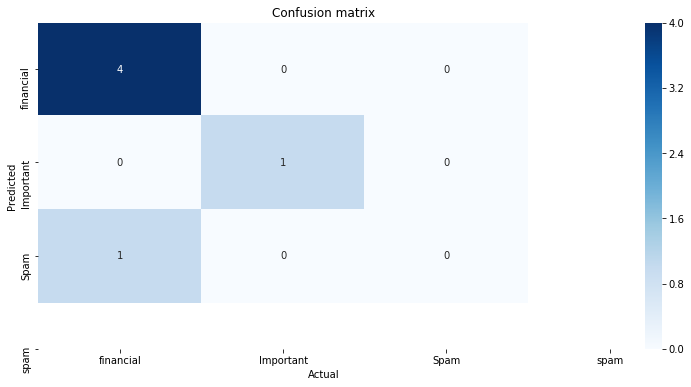

In [123]:
aux_df = df[['Type', 'Category_Code']].drop_duplicates().sort_values('Category_Code')
conf_matrix = confusion_matrix(labels_test, rfc_pred)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['Type'].values, 
            yticklabels=aux_df['Type'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

Let's see if the hyperparameter tuning process has returned a better model:

In [125]:
base_model = RandomForestClassifier(random_state = 8)
base_model.fit(features_train, labels_train)
accuracy_score(labels_test, base_model.predict(features_test))

C:\Users\Sanjana Ashtaputre\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


1.0

In [126]:
best_rfc.fit(features_train, labels_train)
accuracy_score(labels_test, best_rfc.predict(features_test))

0.8333333333333334

In [127]:
d = {
     'Model': 'Random Forest',
     'Training Set Accuracy': accuracy_score(labels_train, best_rfc.predict(features_train)),
     'Test Set Accuracy': accuracy_score(labels_test, rfc_pred)
}

df_models_rfc = pd.DataFrame(d, index=[0])

In [128]:
df_models_rfc

,Model,Training Set Accuracy,Test Set Accuracy
0,Random Forest,1.0,0.833333


Let's save the model and this dataset:

In [130]:
with open('C:\\Users\\Sanjana Ashtaputre\\Downloads//best_rfc.pickle', 'wb') as output:
    pickle.dump(best_rfc, output)
    
with open('C:\\Users\\Sanjana Ashtaputre\\Downloads//df_models_rfc.pickle', 'wb') as output:
    pickle.dump(df_models_rfc, output)